In [361]:
import json
import os
import numpy as np
import pandas as pd
# % matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [362]:
def load_trials_dict(result_dict_location):
    if os.path.exists(result_dict_location):
        with open(result_dict_location, 'r') as f:
            data = json.load(f)
            return data
    return None

In [363]:
DATA_PATH_TO_PLOT = "./trial_results_first_128.json"
#DATA_PATH_TO_PLOT = './trial_results.json'
#DATA_PATH_TO_PLOT = './trial_results_mid_512.json'

In [364]:
data = load_trials_dict(DATA_PATH_TO_PLOT)

In [365]:
data.keys()

dict_keys(['0.0_first', '0.5_first', '0.1_first', '0.2_first', '0.3_first', '0.4_first'])

In [366]:
num_neurons = os.path.splitext(os.path.basename(DATA_PATH_TO_PLOT))[0].split('_')[-1]


In [367]:
# data[list(data.keys())[0]]

In [368]:
std_dict = {}
for model_key in data.keys():
    for dropout_key, scores in data[model_key].items():
        if std_dict.get(model_key) is None:
            std_dict[model_key] = {}
        scores = np.array(scores)
        std_dict[model_key][dropout_key] = round(scores.std(), 6)
        data[model_key][dropout_key] = round(scores.mean(), 6)
        # print(np.round(np.sqrt(np.mean(np.power(arr - arr.mean(), 2))), 5), np.round(arr.std(), 5))

In [369]:
def get_data_as_tuples(primary_key):
    train_rate_acc, test_rate_acc = [], []
    for key in data[primary_key].keys():
        rate = round(float(key.split("_")[0]), 1)
        acc = data[primary_key][key]
        std = std_dict[primary_key][key]
        if "train" in key:
            train_rate_acc.append((rate, acc, std))  # (dropout_rate, accuracy-20-epochs)
        elif "test" in key:
            test_rate_acc.append((rate, acc, std))
    return train_rate_acc, test_rate_acc

In [370]:
train_rate_acc, test_rate_acc = get_data_as_tuples(list(data.keys())[0])

In [371]:
train_rate_acc

[(0.0, 0.979066, 0.000532),
 (0.1, 0.977271, 0.000473),
 (0.2, 0.974873, 0.000708),
 (0.3, 0.959125, 0.000861),
 (0.4, 0.952927, 0.000729),
 (0.5, 0.944055, 0.000709),
 (0.6, 0.928859, 0.000779),
 (0.7, 0.90122, 0.000924),
 (0.8, 0.837559, 0.001339),
 (0.9, 0.61891, 0.001689),
 (1.0, 0.1, 0.0)]

In [372]:
test_rate_acc

[(0.0, 0.9161, 0.0),
 (0.1, 0.914315, 0.001066),
 (0.2, 0.91181, 0.001381),
 (0.3, 0.89518, 0.001171),
 (0.4, 0.890205, 0.001399),
 (0.5, 0.882705, 0.001729),
 (0.6, 0.871845, 0.002501),
 (0.7, 0.85095, 0.002052),
 (0.8, 0.79966, 0.002741),
 (0.9, 0.61709, 0.003423),
 (1.0, 0.1, 0.0)]

In [373]:
def get_unpacked_xy(test_list, train_list):
    test_rate = np.array([tup[0] for tup in test_list])
    test_acc = np.array([tup[1] for tup in test_list])
    test_std = np.array([tup[2] for tup in test_list])
    train_rate = np.array([tup[0] for tup in train_list])
    train_acc = np.array([tup[1] for tup in train_list])
    train_std = np.array([tup[2] for tup in train_list])
    return test_rate, test_acc, test_std, train_rate, train_acc, train_std

0.0_first [0.000532 0.000473 0.000708 0.000861 0.000729 0.000709 0.000779 0.000924
 0.001339 0.001689 0.      ]


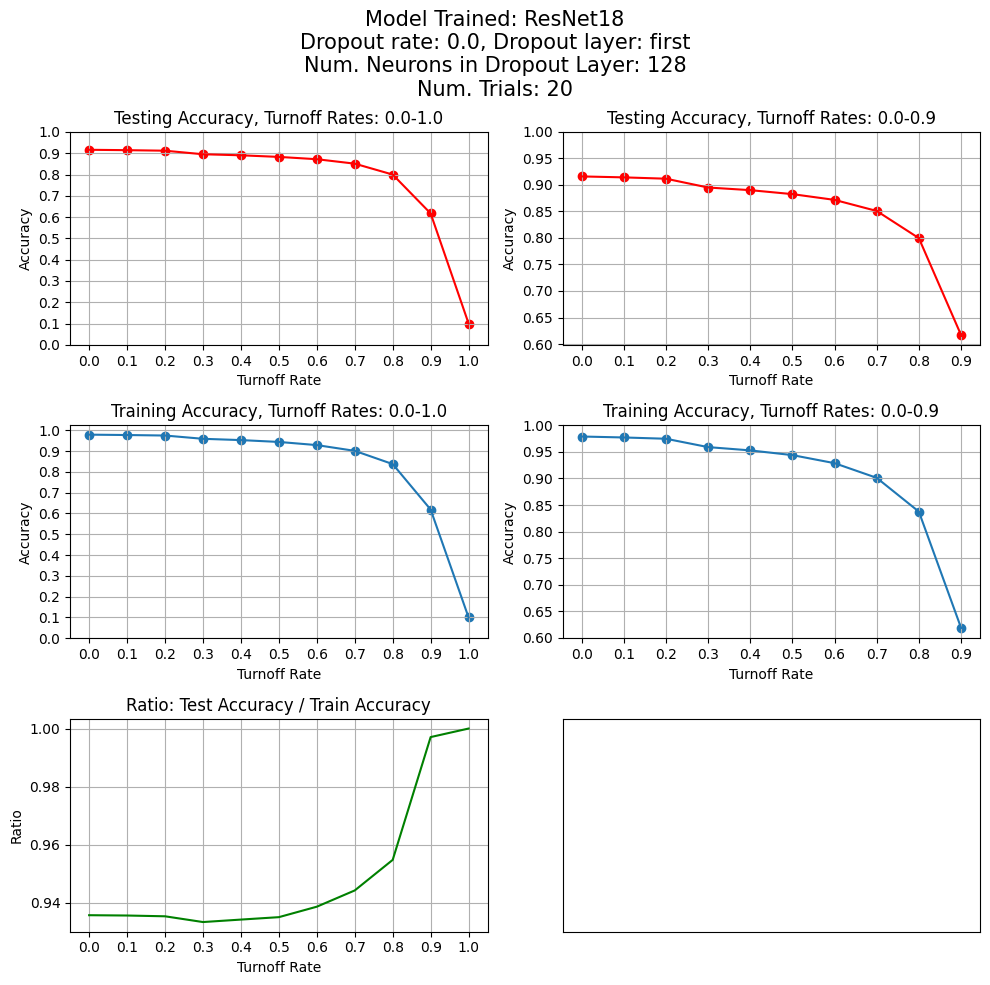

0.5_first [0.000593 0.000512 0.000689 0.000654 0.000775 0.000643 0.00061  0.000538
 0.000874 0.000989 0.      ]


<Figure size 640x480 with 0 Axes>

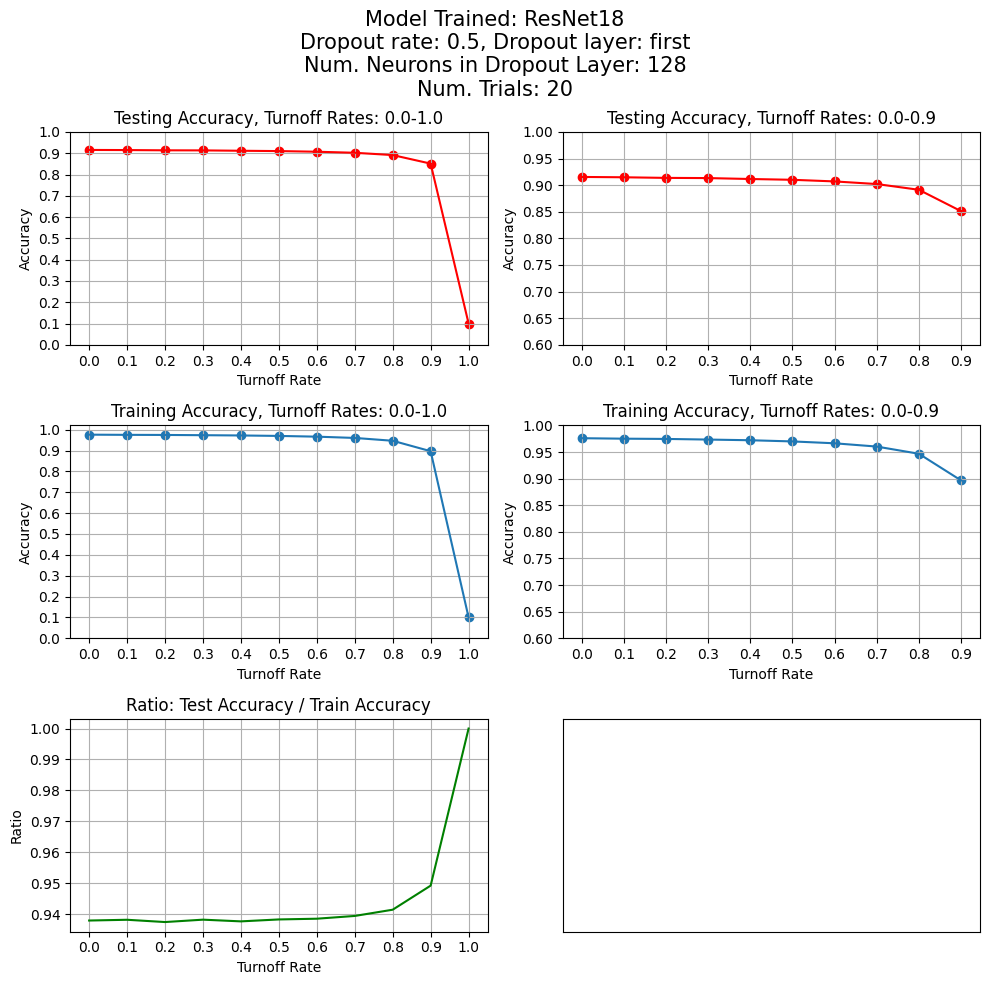

0.1_first [0.002843 0.000656 0.000632 0.000603 0.000731 0.000714 0.000677 0.000713
 0.001421 0.001949 0.      ]


<Figure size 640x480 with 0 Axes>

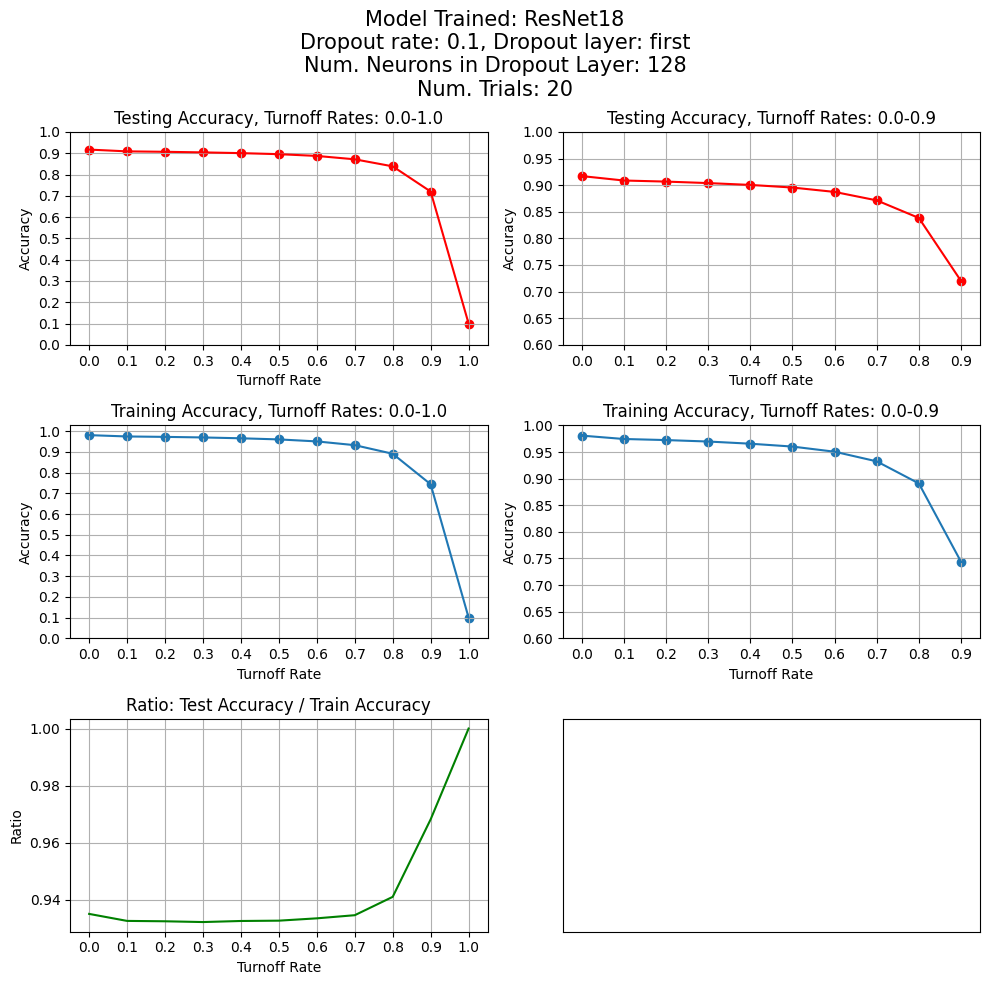

0.2_first [0.000395 0.00059  0.000849 0.000584 0.000799 0.000743 0.000838 0.008424
 0.000671 0.001117 0.      ]


<Figure size 640x480 with 0 Axes>

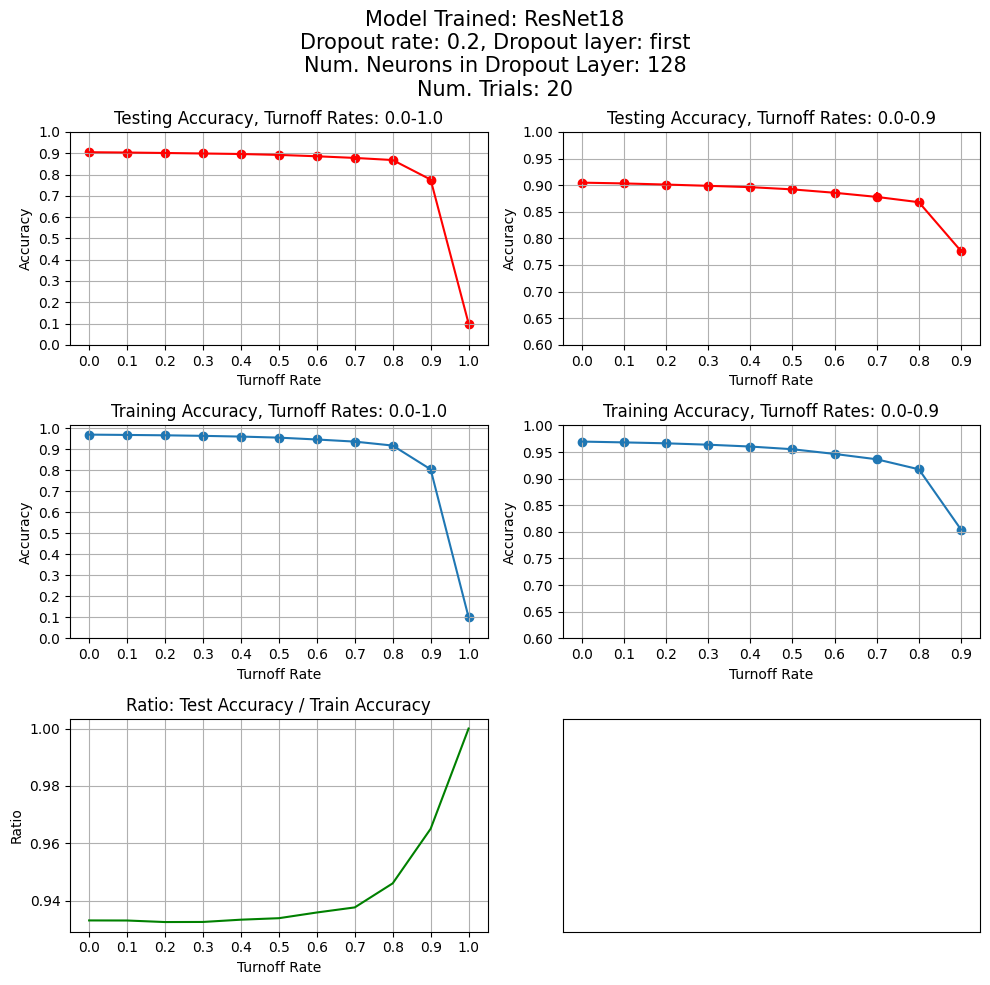

0.3_first [0.000639 0.000539 0.001801 0.000375 0.000515 0.000511 0.000697 0.000706
 0.00059  0.00153  0.      ]


<Figure size 640x480 with 0 Axes>

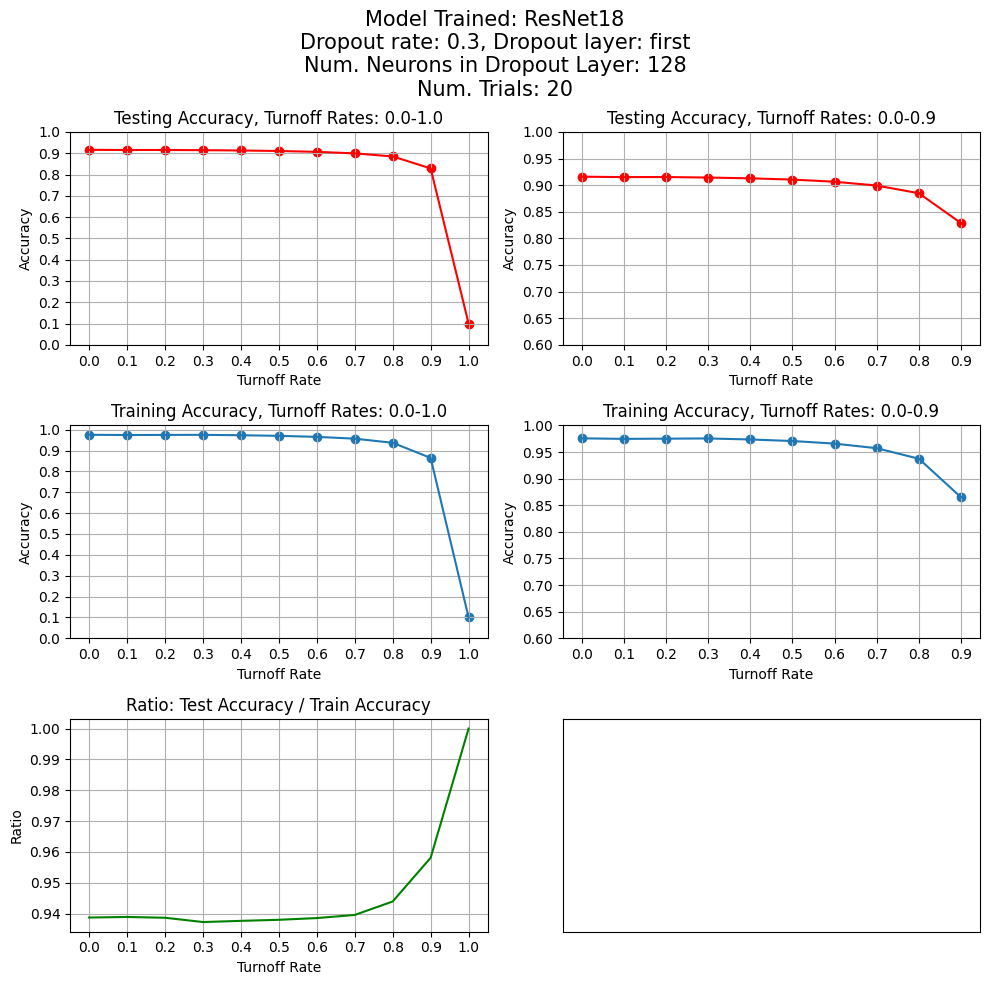

0.4_first [0.000664 0.000986 0.000694 0.00766  0.000503 0.000488 0.000621 0.000666
 0.000722 0.001281 0.      ]


<Figure size 640x480 with 0 Axes>

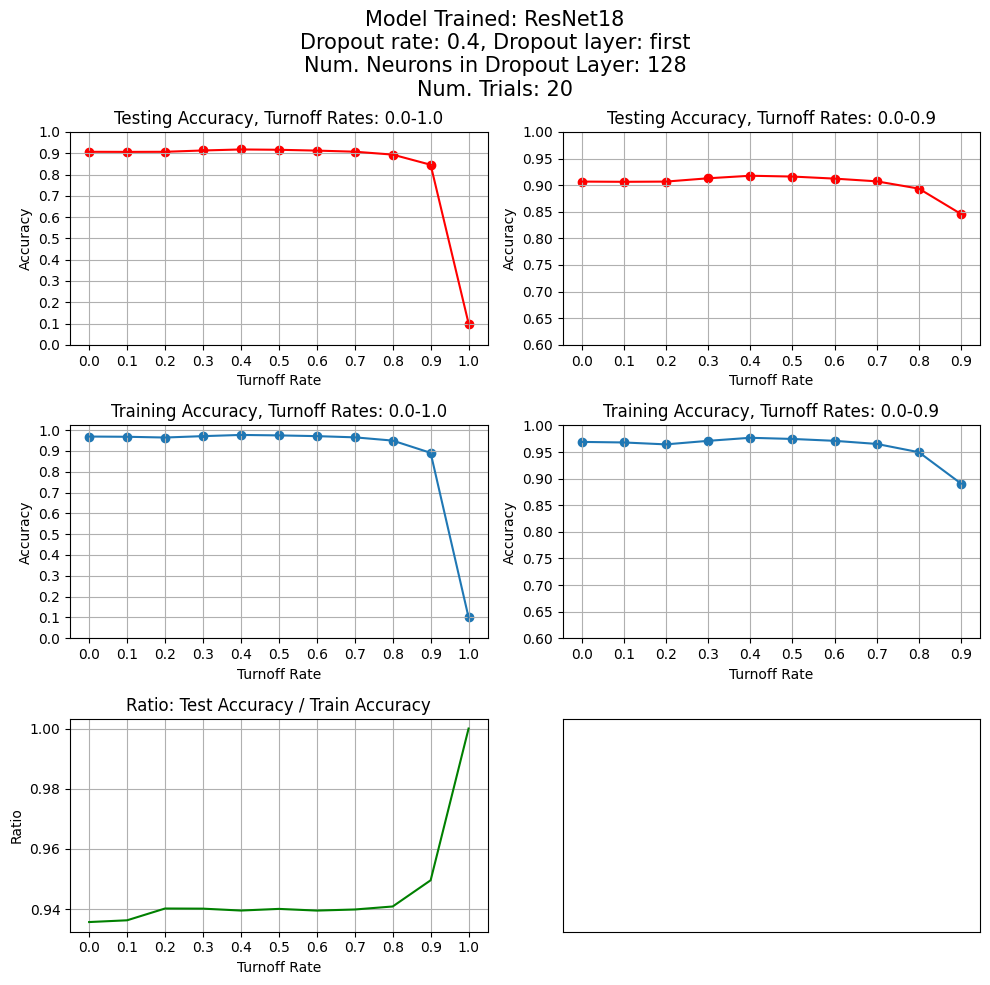

<Figure size 640x480 with 0 Axes>

In [374]:
num_neurons_str = None
for primary_key in data.keys():
    train_rate_acc, test_rate_acc = get_data_as_tuples(primary_key)
    test_rate, test_acc, test_std, train_rate, train_acc, train_std = get_unpacked_xy(test_rate_acc, train_rate_acc)
    print(primary_key, train_std)
    if num_neurons == 'results':
        if "mid" in primary_key:
            num_neurons_str = '256'
        else:
            num_neurons_str = '512'
    else:
        num_neurons_str = num_neurons
    dropout_rate, dropout_layer = primary_key.split('_')

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), layout='tight')
    fig.suptitle(f"Model Trained: ResNet18\n"
                 f"Dropout rate: {dropout_rate}, Dropout layer: {dropout_layer}\n"
                 f"Num. Neurons in Dropout Layer: {num_neurons_str}\n"
                 f"Num. Trials: 20", fontsize=15)
    ax[0, 0].scatter(test_rate, test_acc, c='r')
    ax[0, 0].errorbar(test_rate, test_acc, test_std, c='r')
    ax[0, 0].grid(True)
    ax[0, 0].set_xticks(test_rate)
    ax[0, 0].set_yticks(np.arange(0, 1.1, 0.1))
    ax[0, 0].set_title('Testing Accuracy, Turnoff Rates: 0.0-1.0')
    ax[0, 0].set_xlabel('Turnoff Rate')
    ax[0, 0].set_ylabel('Accuracy')

    ax[0, 1].scatter(test_rate[:-1], test_acc[:-1], c='r')
    ax[0, 1].errorbar(test_rate[:-1], test_acc[:-1], yerr=test_std[:-1], c='r')
    ax[0, 1].grid(True)
    ax[0, 1].set_xticks(test_rate[:-1])
    ax[0, 1].set_yticks(np.arange(0.6, 1.05, 0.05))
    ax[0, 1].set_title('Testing Accuracy, Turnoff Rates: 0.0-0.9')
    ax[0, 1].set_xlabel('Turnoff Rate')
    ax[0, 1].set_ylabel('Accuracy')

    ax[1, 0].scatter(train_rate, train_acc)
    ax[1, 0].errorbar(train_rate, train_acc, train_std)
    ax[1, 0].set_xticks(train_rate)
    ax[1, 0].set_yticks(np.arange(0, 1.1, 0.1))
    ax[1, 0].grid(True)
    ax[1, 0].set_title("Training Accuracy, Turnoff Rates: 0.0-1.0")
    ax[1, 0].set_xlabel('Turnoff Rate')
    ax[1, 0].set_ylabel('Accuracy')

    ax[1, 1].scatter(train_rate[:-1], train_acc[:-1])
    ax[1, 1].errorbar(train_rate[:-1], train_acc[:-1], train_std[:-1])
    ax[1, 1].set_xticks(train_rate[:-1])
    ax[1, 1].grid(True)
    ax[1, 1].set_title("Training Accuracy, Turnoff Rates: 0.0-0.9")
    ax[1, 1].set_yticks(np.arange(0.6, 1.05, 0.05))
    ax[1, 1].set_xlabel('Turnoff Rate')
    ax[1, 1].set_ylabel('Accuracy')

    ratio = test_acc / train_acc
    ax[2, 0].plot(train_rate, ratio, 'g')
    ax[2, 0].set_xticks(train_rate)
    ax[2, 0].grid(True)
    ax[2, 0].set_title("Ratio: Test Accuracy / Train Accuracy")
    ax[2, 0].set_xlabel('Turnoff Rate')
    ax[2, 0].set_ylabel('Ratio')

    ax[2, 1].set_xticks([])
    ax[2, 1].set_yticks([])

    plt.show()
    fig.savefig(f"test/{primary_key}_{num_neurons_str}.png")  # Save the figure as PNG
    plt.clf()  # Clear the entire figure in matplotlib

In [375]:
training_data = {}
testing_data = {}
for primary_key in data.keys():
    primary_key_new = f"{primary_key.replace('_', ' ')} dropout"
    training_data[primary_key_new] = {}
    testing_data[primary_key_new] = {}
    for secondary_key, curr_accuracy in data[primary_key].items():
        dropout_rate, eval_type = secondary_key.split('_')
        rounded_key = f"{round(float(dropout_rate), 2)} turnoff"
        if round(float(dropout_rate), 2) == 1.0:
            continue
        if 'test' in eval_type:
            testing_data[primary_key_new][rounded_key] = curr_accuracy
        else:
            training_data[primary_key_new][rounded_key] = curr_accuracy

In [376]:
train_df = pd.DataFrame(training_data)

In [377]:
test_df = pd.DataFrame(testing_data)

In [378]:
locations= ["first","middle","last"]

In [379]:
def create_heatmap_plots(curr_df, model_stage):
    for location in locations:
        heatmap_data = curr_df.filter(like=location)
        if len(heatmap_data.transpose()):

            # Adjust figure size and aspect ratio
            fig = plt.gcf()
            fig.set_size_inches(8, 6)  # Set the desired figure size
            sns.heatmap(heatmap_data, annot=True)
            plt.title(f'{location} Layer, {model_stage} set')
            plt.tight_layout()
            plt.show()  # Display the current heatmap
            fig.savefig(f"heatmaps/{location}_{model_stage}_heatmap.png")  # Save the figure as PNG




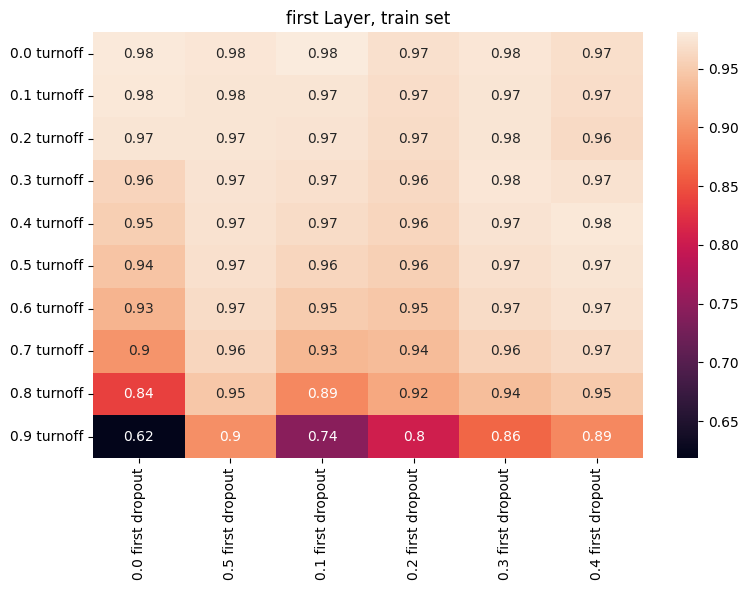

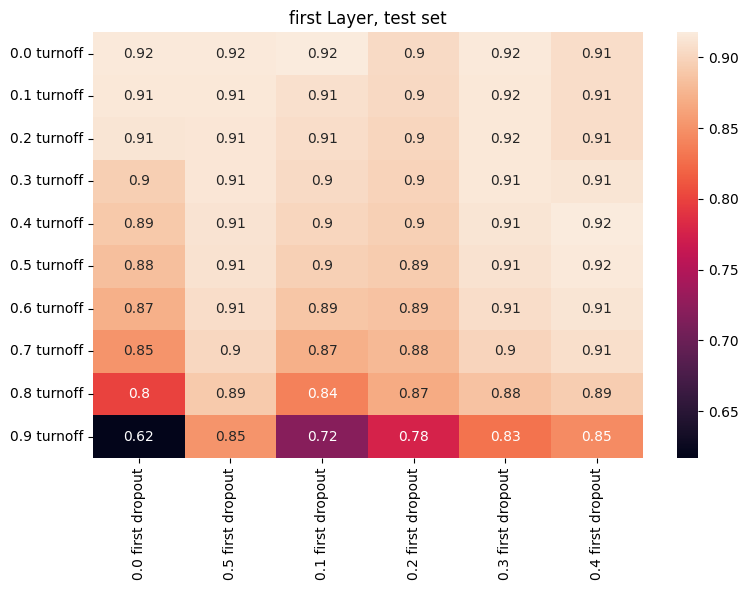

In [380]:
create_heatmap_plots(train_df, "train")
create_heatmap_plots(test_df, "test")